# 量化系统接入及相关平台

2019年2月1日在春节前最后一个交易日，证监会发布了《证券公司交易信息系统外部接入管理暂行规定（征求意见稿）》（见证券时报解读），符合条件的券商可以重新启动程序化外部接入业务，对于券商以及量化私募基金来说，属于行业利好。由于2015年的股灾导致证券公司交易信息系统外部接入暂停，对股票量化交易以及整个量化行业都造成了很大的影响，希望这次重启可以给行业带来曙光。随着量化投资的普及，很多人对量化交易系统以及接入等相关问题有感兴趣，也有很多疑虑，这里重贴笔者之前关于股票跟期货程序化等相关材料的一些梳理，希望有所帮助。

### 一、股票量化交易系统

很多人都在电脑上的客户端或者手机APP上面交易股票的经历，客户端以及手机APP一方面可以看到行情，一方面可以下单，比如用同花顺或者大智慧。股票量化交易系统一般来说跟普通交易者不太一样，由于交易量比较大等因素，希望尽可能降低人为因素的影响，在信号计算与触发、算法交易及交易速度等方面对要求较高。借用宽睿刘总的一张图来说明交易所、证券公司以及投资者在行情以及交易方面的传导过程。如果是股票程序化接入，主要涉及到行情、交易柜台、PB系统、托管机房与网络、自建系统等等。

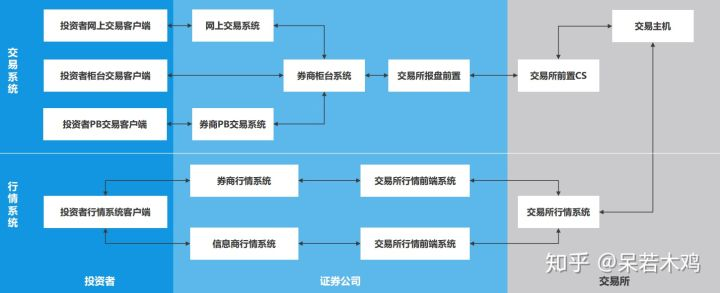

### 1、行情

交易所行情主要分为Level-1跟Level-2, Level-1行情是快照，上交所跟深交所都是3s/笔，Level-2一般是交易所推出的实时行情信息收费服务，包括十档行情，买卖队列，逐笔成交，委托总量和加权价格等多种新式数据（ Level-2里面还有一个很重要的是逐笔委托，很多量化私募以及T0策略要用，这个数据深交所有上交所没有，感谢新杭州彭于晏提醒）。在Level-2之前，沪深交易所提供的都是行情快照,大家看到的分笔成交其实是两次快照期间累计的成交量和最后一笔的价格，而逐笔成交则是真实的每笔成交价和成交量的明细数据逐笔成交极大地提高了行情的透明度。一般情况下，如果只用行情快照的话，而且对速度不是特别敏感的话，Level-1和Level-2的行情没有较大区别， 上海的Level-1虽然升级到了新一代行情，但是依然是通过文件的方式来传输行情数据，速度依然是比Level-2慢。如果做ETF套利什么的，还是需要Level-2。 Level-2如果第三方系统接入要收费， 比较麻烦。私募要用的话可以和券商合作，放到券商在交易所的机房，从券商那边接入，比较省钱。行情转发方面，一般柜台系统自带行情，也有一些是第三方授权转发的行情服务（比如乾隆行情）。

### 2、交易柜台

交易柜台简单来说就是连接交易所的下单系统。通过柜台把交易指令发送到交易所，然后交易所再反馈成交情况给投资者。做交易柜台的主要有恒生、金证、铭创、顶点、根网以及金仕达等公司，这些公司的柜台系统功能模块根据付费多少而不同，也可以根据证券公司需求做开发，提供给投资者使用。普通交易柜台也叫经纪业务柜台，主要是提供给一般投资者使用的。现在类似恒生也提供了UFT（Ultra Fast Trading，极速交易平台），主要针对机构客户。UFT也叫内存交易系统，所有的数据都是在内存中的，交易的时候的单子都是在内存中提取数据校验，速度比较快；传统柜台的话都是数据库操作，提取和存入数据都是要到硬盘上的数据库上，会比较慢。上述交易柜台之前也提供API(Application Programming Interface,应用程序编程接口)供程序化交易者使用，后面监管政策限制也应该暂停了。

除了常听到的上述交易柜台，在股灾之前，一些券商还开发了针对程序化客户的交易柜台，比如华宝证券的LTS，兴业证券类CTP股票交易系统，中泰XTP等，后面监管政策出来之后，券商自建的柜台系统也一并受限了。股票市场这两年发展磕磕碰碰，股票高频及日内回转“T+0”交易策略也流行起来，有些公司针对这类客户也开发了特定的柜台系统，比如宽睿快速柜台系统就号称主打极低时延。

### 3、PB系统

PB(Prime Brokerage)，中文名叫主经纪商，在国外主要是券商为机构客户（特别是对冲基金）提供服务和管理的业务平台，也是对冲基金投资策略得以实施所依赖的重要组成部分。因此，PB是华尔街券商的重要业务部门，为70%的国际对冲基金提供融资和管理服务。主经纪商作为对冲基金的资金方，处于强势地位，PB一方面希望扩大融资规模，另一方面又要面对严峻的融资风险，这本身就对主经纪业务提出了极强的专业化要求。

与国际PB行业的高度集中性不同（华尔街几家投行占据大部分市场），国内PB业务最开始是伴随着股票配资发展起来的，2014以及2015年股市火热，配资需求高涨，恒生HOMS以及一些民间分仓软件带有一定的PB功能。后面监管需求，配资软件基本上从市面上消失了。限制程序化接入之后，恒生PB以及讯投软件等提供了一篮子下单以及简单的算法交易功能，包括还有风控的功能，但是跟国外的PB功能不可同日而语。这几年，一些券商在市场上传统PB的基础上，做了一些功能增强，提供满足程序化交易客户更加灵活的一些需求，比如说中信基于Apama的Cats系统（银河证券很早也采购了Apama系统），国信引进tradestation等，都具有类PB的属性。券商也对一些大的程序化客户，采购客户自己的PB系统进行报备，落定到券商服务器，所以会出现一些券商有数十个PB系统的现象，当然一些PB系统只归专属客户使用。

### 4.专线 、机房、托管

对于股票量化而言，如果是换手率不高的策略，对网络速度要求不高，但是现在的趋势是高频Alpha跟T0等对交易速度提出越来越高的要求。速度除了柜台系统之外，网络以及与交易所物理距离也很有关系。网络专线主要有两种信道，分别是物理专用信道以及虚拟专用信道，现在一般都是虚拟专用线路，不是真的拉一条线，只是保证了这一条线路上你的带宽是你独自占用的，不是和互联网一样带宽是所有共享的，所以这条线路就会比较稳定。相关还有一个概念，席位（其实打板游击队用的更多）。席位就是以前人工在交易所下单的时代的时候的那一个位置，现在被虚化为一个编号，每个券商在交易所可以有多个各个用途的席位，券商柜台下单到交易所的时候都要把席位号传过去才行。每个席位都有一个缓冲队列，在你数据传送到的时候，如果队列的数据没有传送完，你就得在这个队列后面排队。可以想象成高速公路的收费口，前面有车子（数据）要传输，就要先排队，等前面车子开走，如果车子太多，就会“堵车”。证券公司可以给专属客户一个专用席位，这个席位没有其他客户用，这样下单就快。

对于比较大的量化私募公司来说，服务器一般都托管在专属机房里面，包括好做系统备份等。专属机房不一定是上海证通机房或者深圳滨海机房，现在这些机房机柜机位都很紧张，深交所的东莞凤岗电信机房相对宽裕。托管机房主要还是保证交易稳定、可靠，尽可能选择离两个交易所物理距离比较近的地方。

### 二、期货量化交易系统

期货交易系统跟股票交易系统类似。监管政策对期货程序化限制没有股票那么严格，毕竟市场影响比股票小，但是对于股指期货等政策限制，也限制了期货相关量化策略的收益。

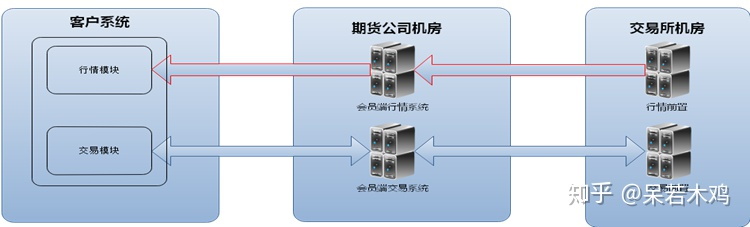

### 三、其他平台

上述两个部分主要讲述的是股票跟期货交易系统方面的内容，主要还是行情、交易以及机房托管等方面的内容。对于量化公司来说，事前策略回测平台以及事后策略评估平台也是一块重点，市场上基于这些需求，也出现了很多相关的平台（见下图）。对于大的量化公司来说，都会建立统一的数据库、统一的回测平台、（同类策略）统一的评价体系、统一的代码托管及统一的交易平台，类似工业流水线作业。但是对于相对小一些的公司或者个人投资者来说，借助一些外部的平台，也是很有必要的。一些回测平台也跟券商进行了合作，后续如果能把信号生成与券商柜台自动交易连接起来，也是好事。

### 1、回测平台

国内主要平台：讯投QMT,米筐Ricequant，聚宽Joinquant，掘金Myquant，优矿Uqer，镭矿Raquant，果仁网，Factors, 宽帮Bigquant, 国泰安，同花顺量化，WIND量化，天软等;

国外对标平台：Quantopian,QuantConnect etc。

### 2、业绩归因

国内主要平台：米筐，倍发科技，况客科技等；

国外对标平台：Barra, Northfield, Axioma。

### 3、FOF投研

国内主要平台：FOF牛牛，朝阳永续，私募排排网，通联魔方，况客科技等；

国外对标平台：Morningstar（部分）。

### 与人为善

如果能掌握上面说的的那些要点，找个高薪的岗位并不困难。但是要工作的舒心顺心，做事之外做人也是非常重要的。工作中，经常会碰到期货公司、证券公司或第三方的技术故障，对待他们稍微宽容一些，学会与人进行良好沟通。不要碰到点小问题就把别人骂的狗血零头，没有必要。再说期货公司、交易所、第三方在做到基本公平的情况下并非资源是完全平等分配的。处理好与外部的关系，在某些资源上别人也更愿意更好更快地为你服务。很多时候，与人方便就是与己方便。从另一方面来说，人生要想走到更高一个发展阶段，光凭技术单打独斗是很难的，要依靠团队作战。团队协作，业务拓展，很多时候情商比智商更重要。